

# Project: Investigate a Dataset (TMDB MOVIES)

### Hana Eissa

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### <a id='intro'></a>
## Introduction
Overview
To complete my Data Analysis project I am using TMDb movies dataset From this link https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub

This dataset contains information about 10 thousand movies collected from (TMDb), including a lot of informtion about movies contain 21 columns such as revenue, budget, genres etc.

After reading the data, I decided to choose these questions for my analysis 
###### 1- what Average runtime of the movies?
###### 2- what Most popular movies?
###### 3- what count movie over year?
###### 4- what movie with highest rate?
###### 5- what outlier movies with low budget and high profit and vice versa?
###### 6- which year we had highest number of profitable movies?



In [146]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



##### After observing the dataset and proposed questions for the analysis i will be keeping only relevent data deleting the unsued data so that i will make my calculation easy and usful.



###### read the data from file.csv

In [164]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tmdb_data = pd.read_csv("tmdb-movies(1).csv")



FileNotFoundError: [Errno 2] File tmdb-movies(1).csv does not exist: 'tmdb-movies(1).csv'

###### previewing the data in table 

In [148]:
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


###### previewing data as list 

In [149]:
tmdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


## Data Cleaning 
### Important observation regarding this process

1.i need to remove unused column such as  imdb_id, vote_count, production_company, keywords, homepage, popularity, budget_adj, revenue_adj, overview, vote_count, vote_average.

2.Removing the duplicacy in the rows(if any).

3.Changing release date column into date format.



#### 1. Removing Unused columns
Columns that i need to delete it ( imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average

In [150]:
#1 remove unused column
delete_Info=[ 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies','vote_count', 'vote_average']

#Delete infornation
tmdb_data = tmdb_data.drop(delete_Info,1)

#Displying data
tmdb_data.head()


,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


#### 2. Removing the duplicacy in the rows(if any).
        Removing duplicate cloumns

In [151]:
#2 Removing  duplicate
tmdb_data.drop_duplicates(keep ='first', inplace=True)

tmdb_data.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


  #### previewing data types that we need it

In [152]:
#show the types of data 
tmdb_data.dtypes


id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

##### 3- now we will change the attribute (release_date) to date format

In [153]:
#3 change release date to a date format
tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'])
tmdb_data.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we are ready to start exploring the data. In this section we will write some code to compute descriptive statistics from the data. we will also create some basic plots of the data.






##### Research Question 1 (Average runtime)

now we will count the avergre of runTime of all of the movies

In [154]:
def avg_RunTime(column):
    return tmdb_data[column].mean()
#calling
avg_RunTime('runtime')


102.07179015186378

102 minutes is the averge of runtime movies, Lets analyse it in a visual form i.e. by graphical approach.


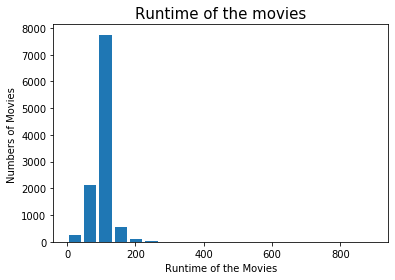

In [155]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height

plt.xlabel('Runtime of the Movies', fontsize = 10)

plt.ylabel('Numbers of Movies ', fontsize=10)

plt.title('Runtime of the movies', fontsize=15)

plt.hist(tmdb_data['runtime'], rwidth = 0.8, bins =20)


plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 100 to 130 minutes. Almost 8000 and more number of movies fall in this criteria.



#### now we will discover the ten most popular movie 

### Research Question 2  (Most popular movie)

In [156]:
top_ten_popular_movies = tmdb_data.nlargest(n=10,columns='popularity')[[ 'id','original_title','popularity']]



In [157]:
# previweing the data
top_ten_popular_movies


,id,original_title,popularity
0,135397,Jurassic World,32.985763
1,76341,Mad Max: Fury Road,28.419936
629,157336,Interstellar,24.949134
630,118340,Guardians of the Galaxy,14.311205
2,262500,Insurgent,13.112507
631,100402,Captain America: The Winter Soldier,12.971027
1329,11,Star Wars,12.037933
632,245891,John Wick,11.422751
3,140607,Star Wars: The Force Awakens,11.173104
633,131631,The Hunger Games: Mockingjay - Part 1,10.739009


   this is the 10 popular movies
    
1- Jurassic World
2- Mad Max: Fury Road
3- Interstellar
4- Guardians of the Galaxy
5- Insurgent
6- Captain America: The Winter Soldier
7- Star Wars
8- John Wick
9- Star Wars: The Force Awakens
10- The Hunger Games: Mockingjay - Part 


### Research Question 3  (count movie over year)
  now we will see the movie over the year in chart

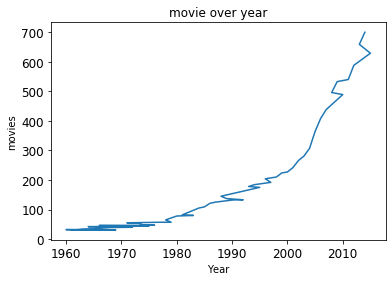

In [158]:

axis = tmdb_data['release_year'].value_counts().plot( kind = "line", title ="movie over year", fontsize=12)
 

axis.set_xlabel("Year", fontsize=10)

axis.set_ylabel("movies", fontsize=10)

plt.show()


So i can conclude both graphically as well as by display the movies over the year between 1960-2010, and year 2010 was the year where movies made the highest moviesmaking



### Research Question 4  (count highest profit for movie)
now we will count the profit of each movie by Subtract revenue from budget


In [159]:
profit = tmdb_data.revenue - tmdb_data.budget
#add the cloumn
tmdb_data['profit'] = profit
# check if the new column was added
tmdb_data.head(1)

,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810


In [160]:
highest_profit = tmdb_data.nlargest(n=10,columns='profit')[['original_title','profit']]
# previewing data
highest_profit  


,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


 Avatar movie is the highest profit movie, Lets analyse it in a visual form i.e. by graphical approach

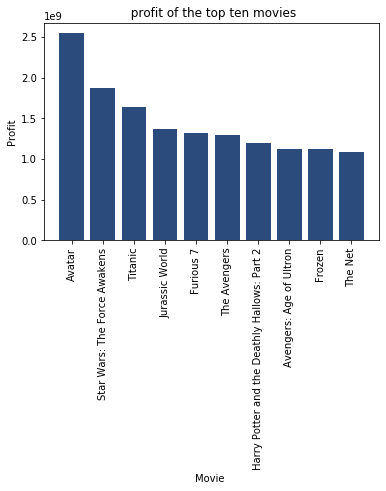

In [161]:
plt.bar(highest_profit['original_title'], highest_profit['profit'], color='#2b4b7c')

plt.xticks(highest_profit['original_title'], rotation = 90)

    
plt.ylabel('Profit', fontsize = 10)
plt.xlabel('Movie ', fontsize = 10)
plt.title('  profit of the top ten movies ', fontsize = 12)
plt.show()

as we see Avatar id the highest profit movie rather than other movies

### Research Question 5  (movie with low budget ,high profit and vice versa)
now we will display movie with low budget and high profit, and movie with high budget and low profit

Text(0, 0.5, 'Budget')

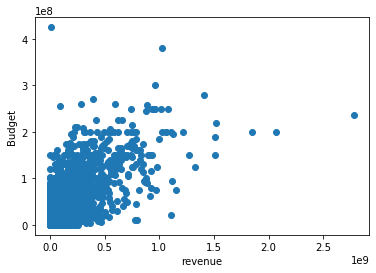

In [162]:
plt.scatter(tmdb_data['revenue'],tmdb_data['budget'])

plt.xlabel('revenue')

plt.ylabel('Budget')

from 0 to 0.5 is the highst Revenue, and as can seen from 1.0 begins to decrease

### Research Question 6  (  profit over year)    "2D" explorations
now we will visulize the profit over each release of year in line chart


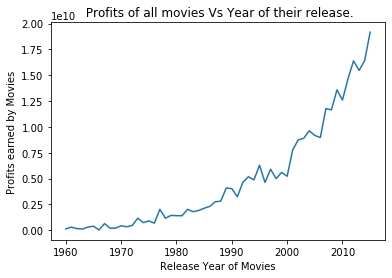

In [163]:
profits_year = tmdb_data.groupby('release_year')['profit'].sum()

#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 10)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 10)
#title of the line plot
plt.title(' Profits of all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the graph
plt.show()


as i can see in the graph, almost the year 2013 was the year where the movies made the highest profit.



<a id='conclusions'></a>
## Conclusions

> **The results we get from using Descriptive Statistics are:**:

 Limitations:  This analysis was done considering the movies which had a significant amount of profit, we have a lot of columns and data it’s not useful, and the types of data might not be completely error free but by following these suggestion one can increase the probability of a movie to become a success. Furthermore, we are not sure if the data provided to us is completely accurate and up-to-date.and we don’t sure if the data is not duplicated, So a difference arises here which can make the complete analysis wrong, Dropping the rows with missing values also affected the overall analysis.
 
 
 
# 1

 Most of the movies are timed between 100 to 130 minutes. Almost 8000 and more number of movies fall in this criteria


# 2 
most popular movie is Jurassic World and Least popularity is The Hunger Games: Mockingjay - Part 1	
	

# 3
I observed a high increase between the years 2000-2010 for making a movie, between 1960-1970
Filmmaking was steadfast، generally I did not notice any decrease

# 4
what is the highest movie profit?
avatar 

what is the lowest movie profit?
titanic

# 5

there are some outlier movies with low budget, with high profit and vice versa

# 6
almost the year 2013 was the year where the movies made the highest profit.








> **references**: 
- https://www.kaggle.com/tmdb/tmdb-movie-metadata
- https://classroom.udacity.com/me


